## Module 3 Assignment

ATMS 523 

Haley Schmidt

October 6, 2025

### Part 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def summarize_station_temps(station_id):
    
    # Import data
    df = pd.read_csv(
        f"s3://noaa-ghcn-pds/csv/by_station/{station_id}.csv",
        storage_options={"anon": True},  
        dtype={"Q_FLAG": "object", "M_FLAG": "object"},
        parse_dates=["DATE"]
    ).set_index("DATE")

    # Select TMAX and TMIN elements
    df = df[df["ELEMENT"].isin(["TMAX", "TMIN"])]

    # Select years from 1991-2020
    df = df[(df.index.year >= 1991) & (df.index.year <= 2020)]

    # Compute record high and low temps
    record_high = df.loc[df["ELEMENT"] == "TMAX", "DATA_VALUE"].max()
    record_low = df.loc[df["ELEMENT"] == "TMIN", "DATA_VALUE"].min()

    # Compute mean high and low temps
    mean_high = df.loc[df["ELEMENT"] == "TMAX", "DATA_VALUE"].mean()
    mean_low = df.loc[df["ELEMENT"] == "TMIN", "DATA_VALUE"].mean()

    # Return pandas df
    summary_df = pd.DataFrame({
        "record_min_temp": [record_low],
        "average_min_temp": [mean_low],
        "average_max_temp": [mean_high],
        "record_max_temp": [record_high]
    })
    
    return summary_df

In [34]:
station_id = "USC00118740"
summary = summarize_station_temps(station_id)
print(summary)

   record_min_temp  average_min_temp  average_max_temp  record_max_temp
0             -317          58.74803        168.237519              394


/var/folders/yn/jk_z3jjj5bq9hv1j210z7_800000gn/T/ipykernel_38566/3557892155.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


## Part 2

In [52]:
def plot_city_temps(station_id, year):
    
    # Import data
    df = pd.read_csv(
        f"s3://noaa-ghcn-pds/csv/by_station/{station_id}.csv",
        storage_options={"anon": True},  
        dtype={"Q_FLAG": "object", "M_FLAG": "object"},
        parse_dates=["DATE"]
    ).set_index("DATE")

    # Select TMAX and TMIN elements
    df = df[df["ELEMENT"].isin(["TMAX", "TMIN"])]

    # Select years from 1991-2020
    df = df[(df.index.year >= 1991) & (df.index.year <= 2020)]

    # Convert to C 
    df["DATA_VALUE"] = df["DATA_VALUE"] / 10

    # Add day of year
    df["DOY"] = df.index.dayofyear
    
    # Compute record high and low temps
    record_high = df[df["ELEMENT"] == "TMAX"].groupby("DOY")["DATA_VALUE"].max()
    record_low = df[df["ELEMENT"] == "TMIN"].groupby("DOY")["DATA_VALUE"].min()

    # Compute mean high and low temps
    mean_high = df[df["ELEMENT"] == "TMAX"].groupby("DOY")["DATA_VALUE"].mean()
    mean_low = df[df["ELEMENT"] == "TMIN"].groupby("DOY")["DATA_VALUE"].mean()
   
    # Actual data for selected year
    df_year = df[df.index.year == year]
    actual_high = df_year[df_year["ELEMENT"] == "TMAX"].set_index("DOY")["DATA_VALUE"]
    actual_low = df_year[df_year["ELEMENT"] == "TMIN"].set_index("DOY")["DATA_VALUE"]

    # Handle leap day 
    is_leap = pd.Timestamp(year=year, month=12, day=31).dayofyear == 366
    if not is_leap:
        record_high = record_high[record_high.index != 366]
        record_low = record_low[record_low.index != 366]
        mean_high = mean_high[mean_high.index != 366]
        mean_low = mean_low[mean_low.index != 366]
        actual_high = actual_high[actual_high.index != 366]
        actual_low = actual_low[actual_low.index != 366]


    # Plot
    plt.figure(figsize=(12, 6))

    # Record range
    plt.fill_between(record_high.index, record_low, record_high, color="pink", label="Record Range (1991-2020)")
    
    # Average range
    plt.fill_between(mean_high.index, mean_low, mean_high, color="lightblue", label="Average Range (1991-2020)")
   
    # Actual temps
    plt.plot(actual_high.index, actual_high, color="darkred", label=f"{year} Highs")
    plt.plot(actual_low.index, actual_low, color="darkblue", label=f"{year} Lows")

    plt.xlabel("Day of Year")
    plt.ylabel("Temperature (C)")
    plt.title(f"Daily Temperatures for Station {station_id} ({year})")
    plt.legend()
    plt.tight_layout()
    plt.show()

/var/folders/yn/jk_z3jjj5bq9hv1j210z7_800000gn/T/ipykernel_38566/3351919142.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


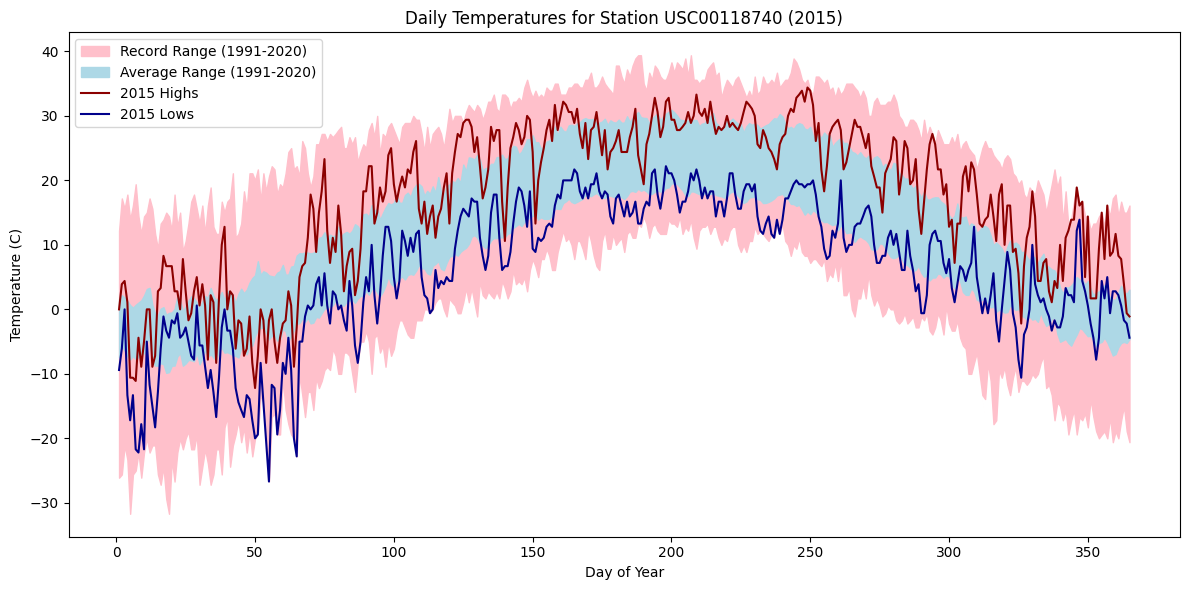

In [55]:
plot_city_temps(station_id, 2015)